In [ ]:
# prompt: MONTAR DRIVE

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 1. Introducción a los espacios de color

* RGB: Representa una imagen como una combinación de rojo, verde y azul.
* Grayscale: Representa una imagen con un solo canal de intensidad, desde el negro al blanco.
* HSV: Representa una imagen en términos de tono (Hue), saturación (Saturation) y valor (Value).

##Instalo e importo librerias necesarias

In [ ]:
!pip install wget -quiet



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
import wget
import cv2                # Importa la librería OpenCV para procesamiento de imágenes
import numpy as np        # Importa numpy, útil para manejar arrays de imágenes
import requests           # Importa requests para descargar imágenes de Internet
import matplotlib.pyplot as plt  # Importa matplotlib para mostrar imágenes en pantalla

# 2. Conversión de espacios de color con OpenCV

Antes de trabajar con una imagen, primero debemos obtenerla y cargarla en nuestro entorno. Usamos la biblioteca requests para descargar la imagen desde una URL, simulando ser un navegador para evitar bloqueos. Después, convertimos la imagen descargada a un formato que OpenCV pueda leer y finalmente la mostramos con matplotlib. Esto nos permite trabajar siempre con imágenes reales, incluso si están en la web.

In [ ]:
# Leer una imagen a color (RGB por defecto en OpenCV)
# (ejemplo del profe, yo use una de una url)
'''
imagen_rgb = cv2.imread('/content/drive/MyDrive/Clases/IMAGEN/007/TEO/Imagenes/messi.jpg')
imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB) # Convertir de BGR a RGB para matplotlib
'''

"\nimagen_rgb = cv2.imread('/content/drive/MyDrive/Clases/IMAGEN/007/TEO/Imagenes/messi.jpg')\nimagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB) # Convertir de BGR a RGB para matplotlib\n"

In [ ]:
# URL de la imagen que queremos usar (puede ser cualquier imagen pública de internet)
url = 'https://mymodernmet.com/wp/wp-content/uploads/2018/09/color-theory-basics.jpg'

# Creamos un diccionario con cabeceras HTTP para simular que somos un navegador web común
''' si no hago esto no me deja bajar la imagen '''
headers = {'User-Agent': 'Mozilla/5.0'}

# Descargamos la imagen usando requests, mandando las cabeceras como si fuéramos un navegador
response = requests.get(url, headers=headers)

# Si hubo algún error en la descarga, este comando lanzará una excepción y parará el código
response.raise_for_status()

# Convertimos la respuesta de la web (en bytes) a un array de numpy
image_arr = np.asarray(bytearray(response.content), dtype=np.uint8)

# Decodificamos ese array de bytes como imagen utilizando OpenCV (por defecto, carga en BGR)
imagen_bgr = cv2.imdecode(image_arr, cv2.IMREAD_COLOR)


## BGR a RGB

In [ ]:
# Convertimos la imagen de BGR (formato de OpenCV) a RGB (formato de matplotlib)
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Mostramos la imagen en pantalla usando matplotlib (en colores reales)
plt.imshow(imagen_rgb)   # Muestra la imagen en RGB
plt.axis('off')          # Oculta los ejes para que la imagen se vea mejor
plt.show()               # Presenta la imagen

Text(0.5, 1.0, 'RGB')

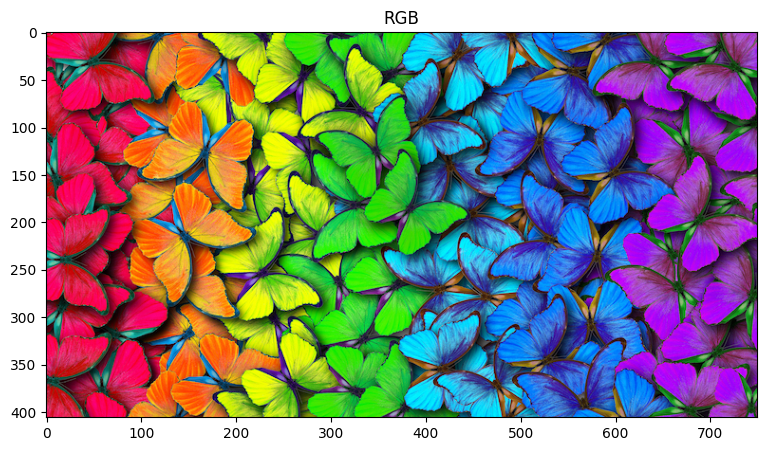

In [ ]:
# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.imshow(imagen_rgb)
plt.title('RGB')

Las imágenes pueden representarse en distintos espacios de color, como RGB, HSV o escala de grises. Para ciertos análisis, como la segmentación por color, es mucho más conveniente trabajar en HSV, donde el tono (Hue) nos permite identificar colores específicos de manera sencilla. Por eso, convertimos la imagen original a otros espacios para visualizar y comparar.

## RGB a Escala de grises

In [ ]:
# Convertir a escala de grises
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'Grayscale')

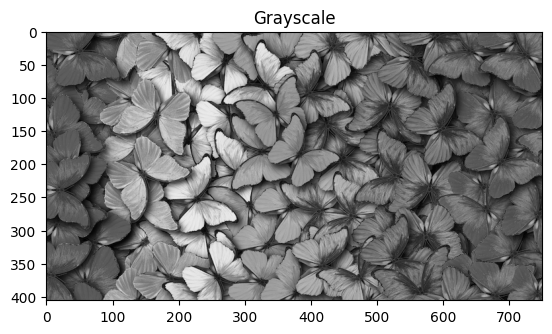

In [ ]:
plt.imshow(imagen_gris, cmap='gray')
plt.title('Grayscale')

##RGB a HSV

In [ ]:
# Convertir a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

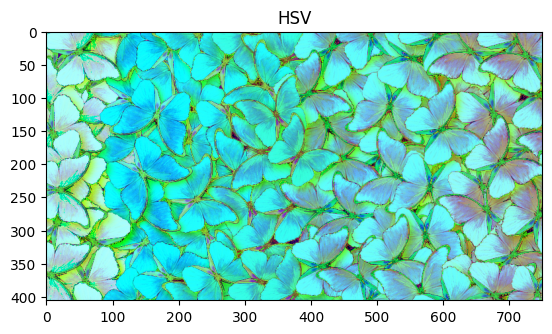

In [ ]:
plt.imshow(imagen_hsv)
plt.title('HSV')
plt.show()

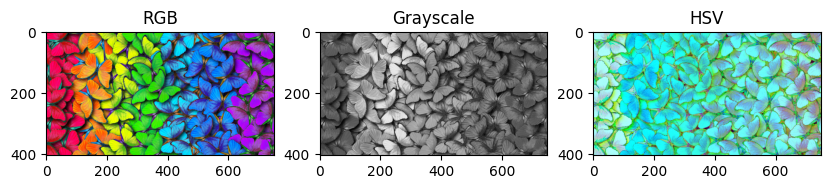

In [ ]:
# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title('RGB')
plt.subplot(1, 3, 2)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Grayscale')
plt.subplot(1, 3, 3)
plt.imshow(imagen_hsv)
plt.title('HSV')
plt.show()

# 3. Manipulación de canales de color

##Extraccion de canales en RGB y HSV

In [ ]:
# Extraer los canales de color
r, g, b = cv2.split(imagen_rgb)
h, s, v = cv2.split(imagen_hsv)

In [ ]:
# Crear imágenes con un solo canal
imagen_r = cv2.merge([r, np.zeros_like(g), np.zeros_like(b)])
imagen_g = cv2.merge([np.zeros_like(r), g, np.zeros_like(b)])
imagen_b = cv2.merge([np.zeros_like(r), np.zeros_like(g), b])

imagen_h = cv2.merge([h, np.zeros_like(s), np.zeros_like(v)])
imagen_s = cv2.merge([np.zeros_like(h), s, np.zeros_like(v)])
imagen_v = cv2.merge([np.zeros_like(h), np.zeros_like(s), v])

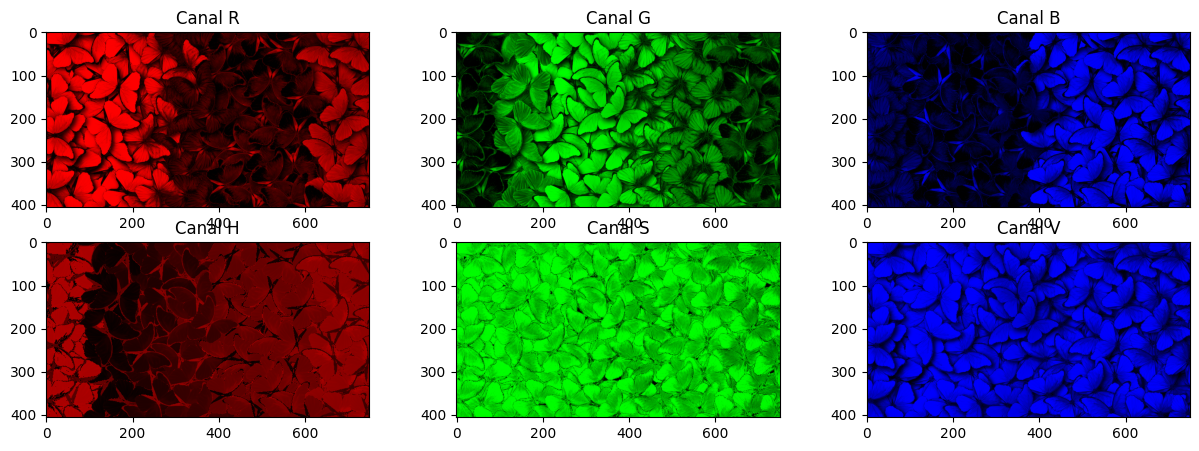

In [ ]:
# Mostrar los canales
plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.imshow(imagen_r)
plt.title('Canal R')
plt.subplot(2, 3, 2)
plt.imshow(imagen_g)
plt.title('Canal G')
plt.subplot(2, 3, 3)
plt.imshow(imagen_b)
plt.title('Canal B')
plt.subplot(2, 3, 4)
plt.imshow(imagen_h, cmap='hsv')
plt.title('Canal H')
plt.subplot(2, 3, 5)
plt.imshow(imagen_s)
plt.title('Canal S')
plt.subplot(2, 3, 6)
plt.imshow(imagen_v)
plt.title('Canal V')
plt.show()

## Brillo y contraste en RGB (convertScaleAbs)

In [ ]:
# 4. Ajuste de brillo y contraste
# Función para ajustar brillo y contraste
def ajustar_brillo_contraste(imagen, brillo=0, contraste=1.0):
    imagen_ajustada = cv2.convertScaleAbs(imagen, alpha=contraste, beta=brillo)
    return imagen_ajustada

In [ ]:
# Ajustar brillo y contraste
imagen_brillo_100 = ajustar_brillo_contraste(imagen_rgb, brillo=100)
imagen_contraste_2 = ajustar_brillo_contraste(imagen_rgb, contraste=2.0)

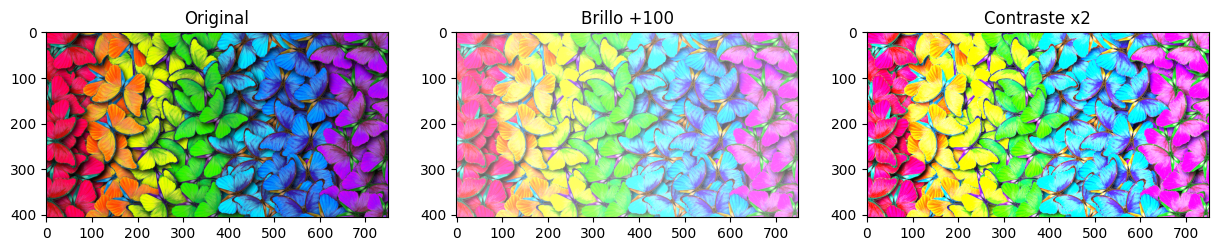

In [ ]:
# Mostrar los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(imagen_brillo_100)
plt.title('Brillo +100')
plt.subplot(1, 3, 3)
plt.imshow(imagen_contraste_2)
plt.title('Contraste x2')
plt.show()

##Brillo y contraste con HSV (sobre capa V)

In [ ]:
# Ajustar brillo y contraste en HSV
imagen_hsv_ajustada = imagen_hsv.copy()
imagen_hsv_ajustada[:,:,2] = np.clip(imagen_hsv_ajustada[:,:,2] * 1.5, 0, 255) # Aumentar el valor (brillo)
imagen_rgb_ajustada_hsv = cv2.cvtColor(imagen_hsv_ajustada, cv2.COLOR_HSV2RGB)

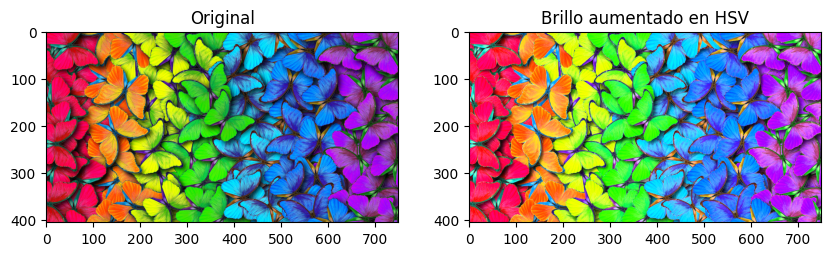

In [ ]:
# Mostrar el resultado del ajuste de brillo en HSV
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(imagen_rgb_ajustada_hsv)
plt.title('Brillo aumentado en HSV')
plt.show()

# 5. Aplicaciones prácticas: segmentar parte roja

## cargo imagen

In [ ]:
!wget = 'https://dpplus.es/wp-content/uploads/2017/04/simbologia-del-color.jpg'

--2025-06-13 01:42:54--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2025-06-13 01:42:54--  https://dpplus.es/wp-content/uploads/2017/04/simbologia-del-color.jpg
Resolving dpplus.es (dpplus.es)... 217.76.130.192
Connecting to dpplus.es (dpplus.es)|217.76.130.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148906 (145K) [image/jpeg]
Saving to: ‘simbologia-del-color.jpg’

simbologia-del-colo 100%[===================>] 145.42K   415KB/s    in 0.4s    

2025-06-13 01:42:55 (415 KB/s) - ‘simbologia-del-color.jpg’ saved [148906/148906]

FINISHED --2025-06-13 01:42:55--
Total wall clock time: 1.1s
Downloaded: 1 files, 145K in 0.4s (415 KB/s)


In [ ]:
# Leer una imagen a color (RGB por defecto en OpenCV)
imagen_rgb = cv2.imread('simbologia-del-color.jpg')


##convierto BGR a RGB

In [ ]:
imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB) # Convertir de BGR a RGB para matplotlib

##convierto RGB a HSV

In [ ]:
# Convertir a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

##segmento color rojo

Para segmentar un color específico en una imagen, como el rojo, es útil trabajar en el espacio HSV porque nos permite definir rangos de tonos de manera precisa. El rojo tiene una característica especial: en la escala HSV de OpenCV, aparece tanto al principio como al final de la escala, por lo que necesitamos definir dos rangos para capturarlo por completo. Así, generamos máscaras que señalan únicamente los píxeles rojos de la imagen.

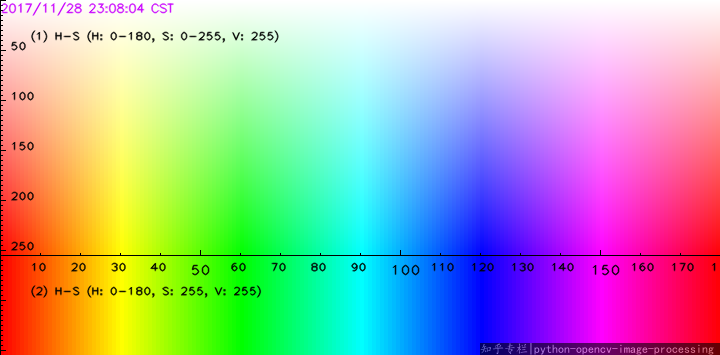

In [ ]:
# Segmentación básica por color utilizando HSV
# Definir el rango de color a segmentar (ejemplo: rojo)
#limite_inferior_rojo = np.array([170, 120, 70])
#limite_superior_rojo = np.array([180, 255, 255])

In [ ]:
# En HSV, el rojo se encuentra en dos regiones debido a la forma circular de la representación del matiz (H):

#Rango bajo (rojo oscuro hasta rojo puro):
#Mínimo: (0, 120, 70)
#Máximo: (10, 255, 255)

#Rango alto (rojo puro hasta rojo brillante):
#Mínimo: (170, 120, 70)
#Máximo: (180, 255, 255)

#Explicación:
#H (Hue - Matiz): El rojo está alrededor de 0° y 180° en la escala de OpenCV.
#S (Saturation - Saturación): Valores altos garantizan que el rojo sea vibrante.
#V (Value - Brillo): Ajustando este parámetro puedes detectar distintos niveles de luz en la imagen.

### determino rango del rojo y creo mascaras

In [ ]:
# Supongamos que ya tenés la imagen cargada en imagen_rgb
# Convertimos la imagen de RGB a HSV (Hue-Saturation-Value) para facilitar la segmentación de colores
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

# Definir el primer rango de rojo en HSV (rojo oscuro al rojo puro, zona baja de la escala)
bajo_rojo1 = np.array([0, 120, 70])      # Valor mínimo para el rango bajo
alto_rojo1 = np.array([10, 255, 255])    # Valor máximo para el rango bajo

# Definir el segundo rango de rojo en HSV (rojo puro al rojo brillante, zona alta de la escala)
bajo_rojo2 = np.array([170, 120, 70])    # Valor mínimo para el rango alto
alto_rojo2 = np.array([180, 255, 255])   # Valor máximo para el rango alto

# Crear la máscara para el rango bajo de rojo
mascara_rojo1 = cv2.inRange(imagen_hsv, bajo_rojo1, alto_rojo1)

# Crear la máscara para el rango alto de rojo
mascara_rojo2 = cv2.inRange(imagen_hsv, bajo_rojo2, alto_rojo2)

# Combinar ambas máscaras usando una operación lógica OR
mascara_roja = cv2.bitwise_or(mascara_rojo1, mascara_rojo2)






###aplico mascara sobre el original

Una vez que tenemos la máscara que identifica los píxeles del color deseado, la aplicamos sobre la imagen original. Esto nos permite crear una nueva imagen en la que solo aparecen las zonas que cumplen con la condición de color. Finalmente, mostramos en pantalla la imagen original, la máscara en blanco y negro, y el resultado de la segmentación para comparar y analizar visualmente el proceso.

In [ ]:
# Aplicar la máscara sobre la imagen original para dejar solo las zonas rojas visibles
resultado = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_roja)

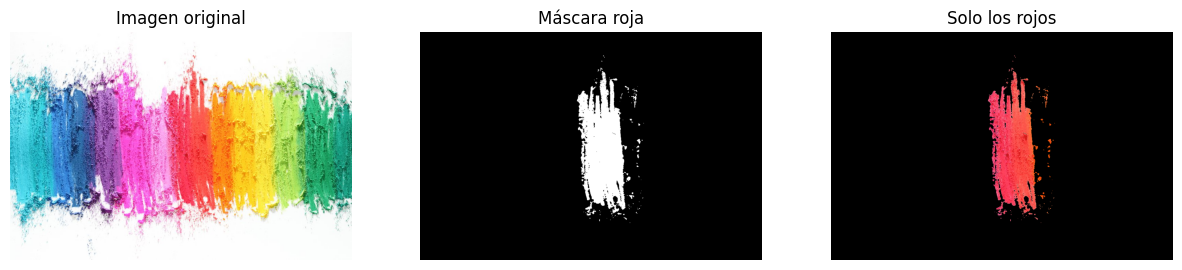

In [ ]:
# Mostrar la imagen original, la máscara y el resultado usando matplotlib
plt.figure(figsize=(15,5))  # Tamaño de la figura

plt.subplot(1,3,1)  # Primer panel: imagen original
plt.title('Imagen original')
plt.imshow(imagen_rgb)
plt.axis('off')

plt.subplot(1,3,2)  # Segundo panel: máscara de color rojo
plt.title('Máscara roja')
plt.imshow(mascara_roja, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)  # Tercer panel: resultado final (solo los rojos)
plt.title('Solo los rojos')
plt.imshow(resultado)
plt.axis('off')

plt.show()  # Muestra la figura completa con los tres paneles

Es importante destacar que los valores de los rangos de color pueden necesitar ajustes según la imagen y el color que queramos segmentar. Experimentar con distintos valores de matiz, saturación y brillo nos ayuda a afinar el resultado y entender mejor cómo se comportan los colores en HSV.

